In [546]:
import pandas as pd

The error message you received indicates that there was an issue decoding the CSV file because it contains characters that cannot be interpreted as valid UTF-8. This error commonly occurs when the file is encoded in a different format or if it contains special characters that are not compatible with the selected encoding.

To resolve this issue, you can try the following steps:

Specify the correct encoding: If you know the encoding of the CSV file, you can specify it explicitly by using the encoding parameter of the read_csv function. For example, if the file is encoded in Latin-1, you can try pd.read_csv("spam.csv", encoding="latin-1"). If you're unsure about the encoding, you may need to try different encodings until you find the correct one.

Check the file contents: Open the CSV file in a text editor or a spreadsheet program and inspect the content. Look for any unusual characters or special symbols that might be causing the decoding error. Removing or replacing those characters might allow the file to be read successfully.

Try alternative parsing libraries: Instead of using Pandas' read_csv, you can try using other libraries specifically designed for handling different encodings or corrupted files. One such library is chardet which can automatically detect the encoding of a file. You can install it using pip install chardet and then use it to detect the encoding before reading the file.

python
Copy code
import chardet
with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
df = pd.read_csv("spam.csv", encoding=encoding)
Fix the file encoding: If you determine that the file is indeed encoded incorrectly, you can try converting it to UTF-8 or another desired encoding using a text editor or a file conversion tool. Save the file with the corrected encoding and then try reading it again.
By applying these steps, you should be able to resolve the UnicodeDecodeError and successfully read the CSV file.








In [547]:
import chardet
with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
df = pd.read_csv("spam.csv", encoding=encoding)

In [548]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [549]:
df.shape

(5572, 5)

# there will be 5 stages in which we will solve 

1 data cleaning
2 data analysing 
3 text preprocessing 
4 model building 
5 evaluation
6 improvment 
7 website m convertion 
8 deploy

# 1 data cleaning

Data cleaning is an essential step in the machine learning pipeline to ensure the quality and reliability of the data. Here are various ways to perform data cleaning in machine learning:

Handling missing data: Missing data can be problematic for machine learning algorithms. Some common strategies for handling missing data include:

Removing rows or columns with missing values.
Imputing missing values using techniques such as mean, median, mode, or interpolation.
Using advanced techniques like multiple imputation or predictive modeling to fill in missing values.
Handling outliers: Outliers are data points that deviate significantly from the rest of the data. Outliers can have a negative impact on the performance of machine learning models. Some ways to handle outliers include:

Identifying and removing the outliers if they are due to measurement errors or data entry mistakes.
Transforming the data using techniques like log transformation to reduce the impact of outliers.
Using robust statistical methods that are less sensitive to outliers.
Dealing with inconsistent or incorrect data:

Standardizing data formats: Convert data into a consistent format. For example, converting dates into a standardized format or ensuring consistent units of measurement.
Correcting errors: Identify and correct any obvious errors or inconsistencies in the data.
Removing duplicate data: Identify and remove duplicate entries in the dataset.
Handling categorical variables:

One-Hot Encoding: Convert categorical variables into binary vectors, where each category becomes a separate feature.
Label Encoding: Assign unique numerical labels to each category.
Ordinal Encoding: Assign numerical labels to each category based on their order or rank.
Feature scaling: Scale numerical features to a similar range to prevent certain features from dominating others. Common scaling techniques include:

Standardization: Transforming data to have zero mean and unit variance.
Normalization: Scaling data to a range between 0 and 1.
Handling imbalanced classes: If the target variable is imbalanced, where one class has significantly more instances than the others, it can affect the model's performance. Some techniques to address this issue include:

Oversampling the minority class: Increase the number of instances in the minority class by duplicating or generating synthetic samples.
Undersampling the majority class: Reduce the number of instances in the majority class by randomly selecting a subset of samples.
Using class weights: Assigning higher weights to the minority class during model training to give it more importance.
Removing irrelevant features: Removing features that do not contribute much information to the model can improve the efficiency and simplicity of the model. Feature selection techniques such as correlation analysis, feature importance, or dimensionality reduction methods like Principal Component Analysis (PCA) can help identify and remove irrelevant features.

These are some common techniques for data cleaning in machine learning. The specific methods employed will depend on the characteristics of the dataset and the goals of the analysis. It's important to carefully analyze and understand the data before applying any cleaning techniques.

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [551]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

since last 3 column have lot of  non null values so we will drop this column 

In [552]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [553]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [554]:
# renaming the columns 

In [555]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

In [556]:
# we will use label encoder to change the ham and spam to a numeric digit from sklearn.preprocessor 

In [557]:
df.columns

Index(['target', 'text'], dtype='object')

In [558]:
import sklearn

In [559]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
df['target'] = encoding.fit_transform(df['target'])

In [560]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


we mainly check two things to clean the data 
 1  missing values 
 2  duplicate values 

In [561]:
# missing values


In [562]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [563]:
# duplicate values 

In [564]:
df.duplicated().sum()

403

In [565]:
# we will remove this duplicate value form the data set 

In [566]:
df = df.drop_duplicates(keep = 'first')

In [567]:
df.duplicated().sum()

0

In [568]:
df.shape

(5169, 2)

# data analysis or EDA 

In [569]:
# since the data contain only two column we have to analyse firsly
# 1  i will find out how much data is spam and ham

In [570]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [571]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [572]:
import matplotlib.pyplot as plt

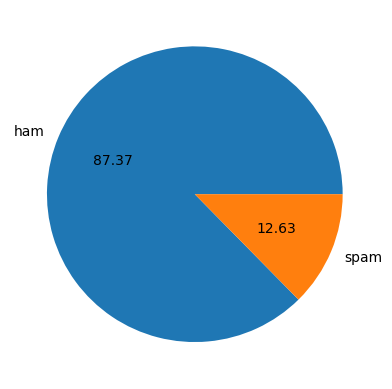

In [573]:
plt.pie(df['target'].value_counts(), labels =['ham', 'spam'],autopct="%0.2f")
plt.show()

In [574]:
# data is imbalances 

In [575]:
# for deeper anaylis 
# how much alphabet is used , how much words are used and how much sentence are there 

In [576]:
import nltk # this is a library for all these deeper analysis about caracter , words , sentences

In [577]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [578]:
df['len_of_text'] = df['text'].apply(len)

In [579]:
df['len_of_text']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: len_of_text, Length: 5169, dtype: int64

In [580]:
df['len_of_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [581]:
df['len_of_word']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: len_of_word, Length: 5169, dtype: int64

In [582]:
df['len_of_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [583]:
df['len_of_sent']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: len_of_sent, Length: 5169, dtype: int64

In [584]:
df.head()

,target,text,len_of_text,len_of_word,len_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [585]:
df.describe()

,target,len_of_text,len_of_word,len_of_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [586]:
df[df['target'] == 0 ][['len_of_word', 'len_of_text','len_of_sent']].describe()

,len_of_word,len_of_text,len_of_sent
count,4516.000000,4516.000000,4516.000000
mean,17.120903,70.459256,1.799601
std,13.493725,56.358207,1.278465
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,28.000000


In [587]:
df[df['target'] == 1 ][['len_of_word', 'len_of_text','len_of_sent']].describe()

,len_of_word,len_of_text,len_of_sent
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.967841
std,7.008418,30.137753,1.483201
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,8.000000


In [588]:
import seaborn as sns

<Axes: xlabel='len_of_text', ylabel='Count'>

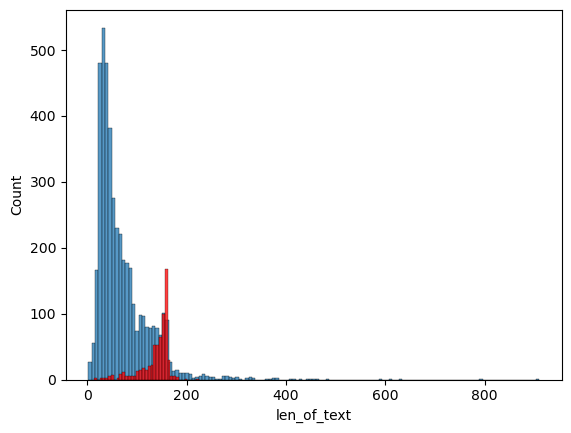

In [589]:
sns.histplot(df[df['target'] == 0 ]['len_of_text'])
sns.histplot(df[df['target'] == 1 ]['len_of_text'],color = 'red')

<Axes: xlabel='len_of_word', ylabel='Count'>

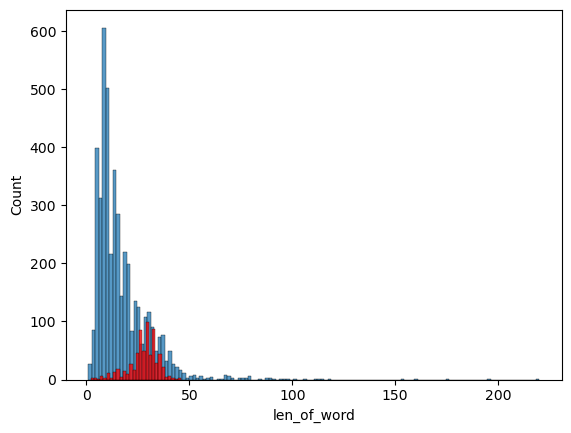

In [590]:
sns.histplot(df[df['target'] == 0 ]['len_of_word'])
sns.histplot(df[df['target'] == 1 ]['len_of_word'],color = 'red')

<Axes: xlabel='len_of_sent', ylabel='Count'>

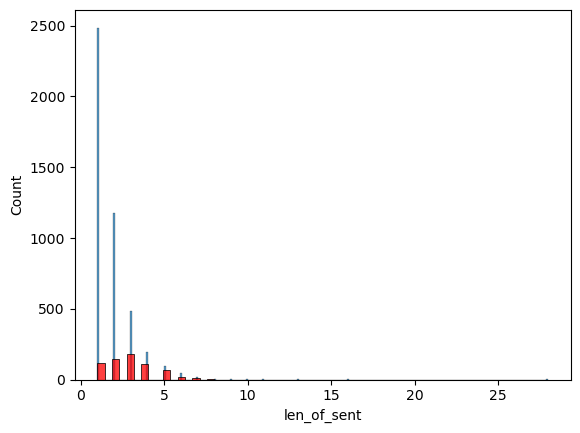

In [591]:
sns.histplot(df[df['target'] == 0 ]['len_of_sent'])
sns.histplot(df[df['target'] == 1 ]['len_of_sent'],color = 'red')

In [592]:
# we can find the corelation between the no of word to no of sentence or sentence to text using pairplot 

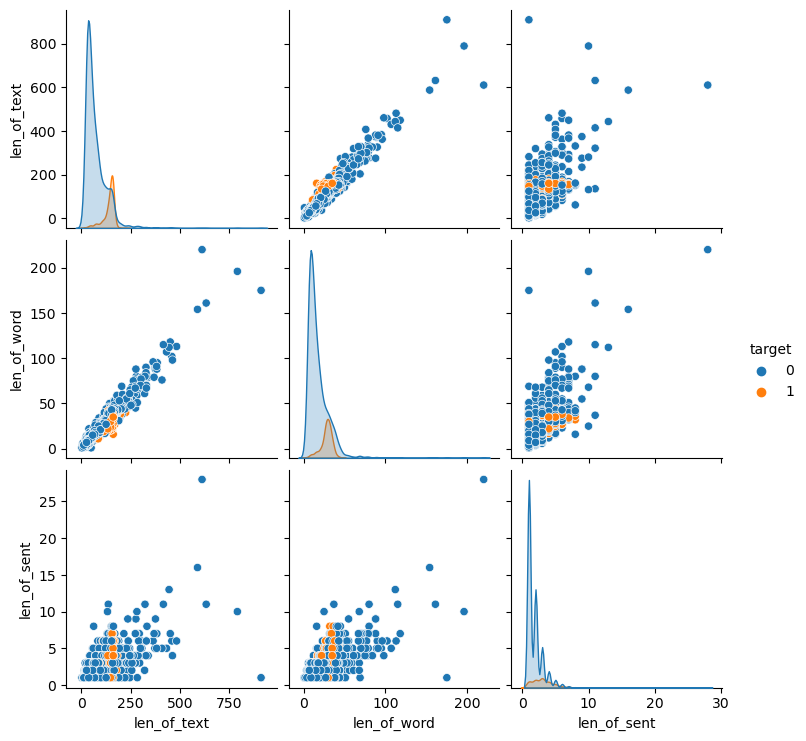

In [593]:
sns.pairplot(df, hue='target')

C:\Users\BIIT\AppData\Local\Temp\ipykernel_1428\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

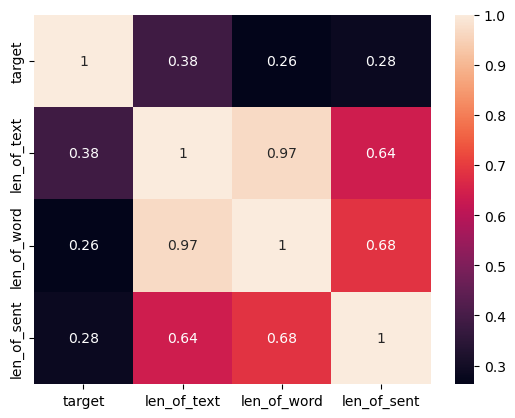

In [594]:
sns.heatmap(df.corr(),annot = True)

In [595]:
# here in the heatmap as we can  the colinerarity between the  sent and text is so high but we have to keep only one in model because it
# it is so complex as we can see the target value is so hiigh with len_of_text so we will keep this in the model

# data preprocessiong 

method are 

1 lower case  ,
2 tokenizor    ,
3 removing special characters   ,
4 removing stop word and punchuation    ,
5 stremming   

In [596]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()   
    
    for i in text:
        y.append(ps.stem(i))
            
    return "  ".join(y)
    

In [597]:
import nltk

In [598]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [599]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [600]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [601]:
transform_text('hi Hke Are  %% you ? shruti ^ , loving the maths ')

'hi  hke  shruti  love  math'

In [602]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [603]:
from nltk.stem.porter import PorterStemmer
ps   =  PorterStemmer()
ps.stem('loving')

'love'

In [604]:
df['transformed_text'] = df['text'].apply(transform_text)

In [605]:
df.head()

,target,text,len_of_text,len_of_word,len_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [606]:
# firstly we will make word cloud which will help us to jo words important hai usko bda karke show kareg a 

In [607]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [608]:
from wordcloud import WordCloud

In [609]:
wc   = WordCloud(width = 500,height = 500, min_font_size=10, background_color= "white")

In [610]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

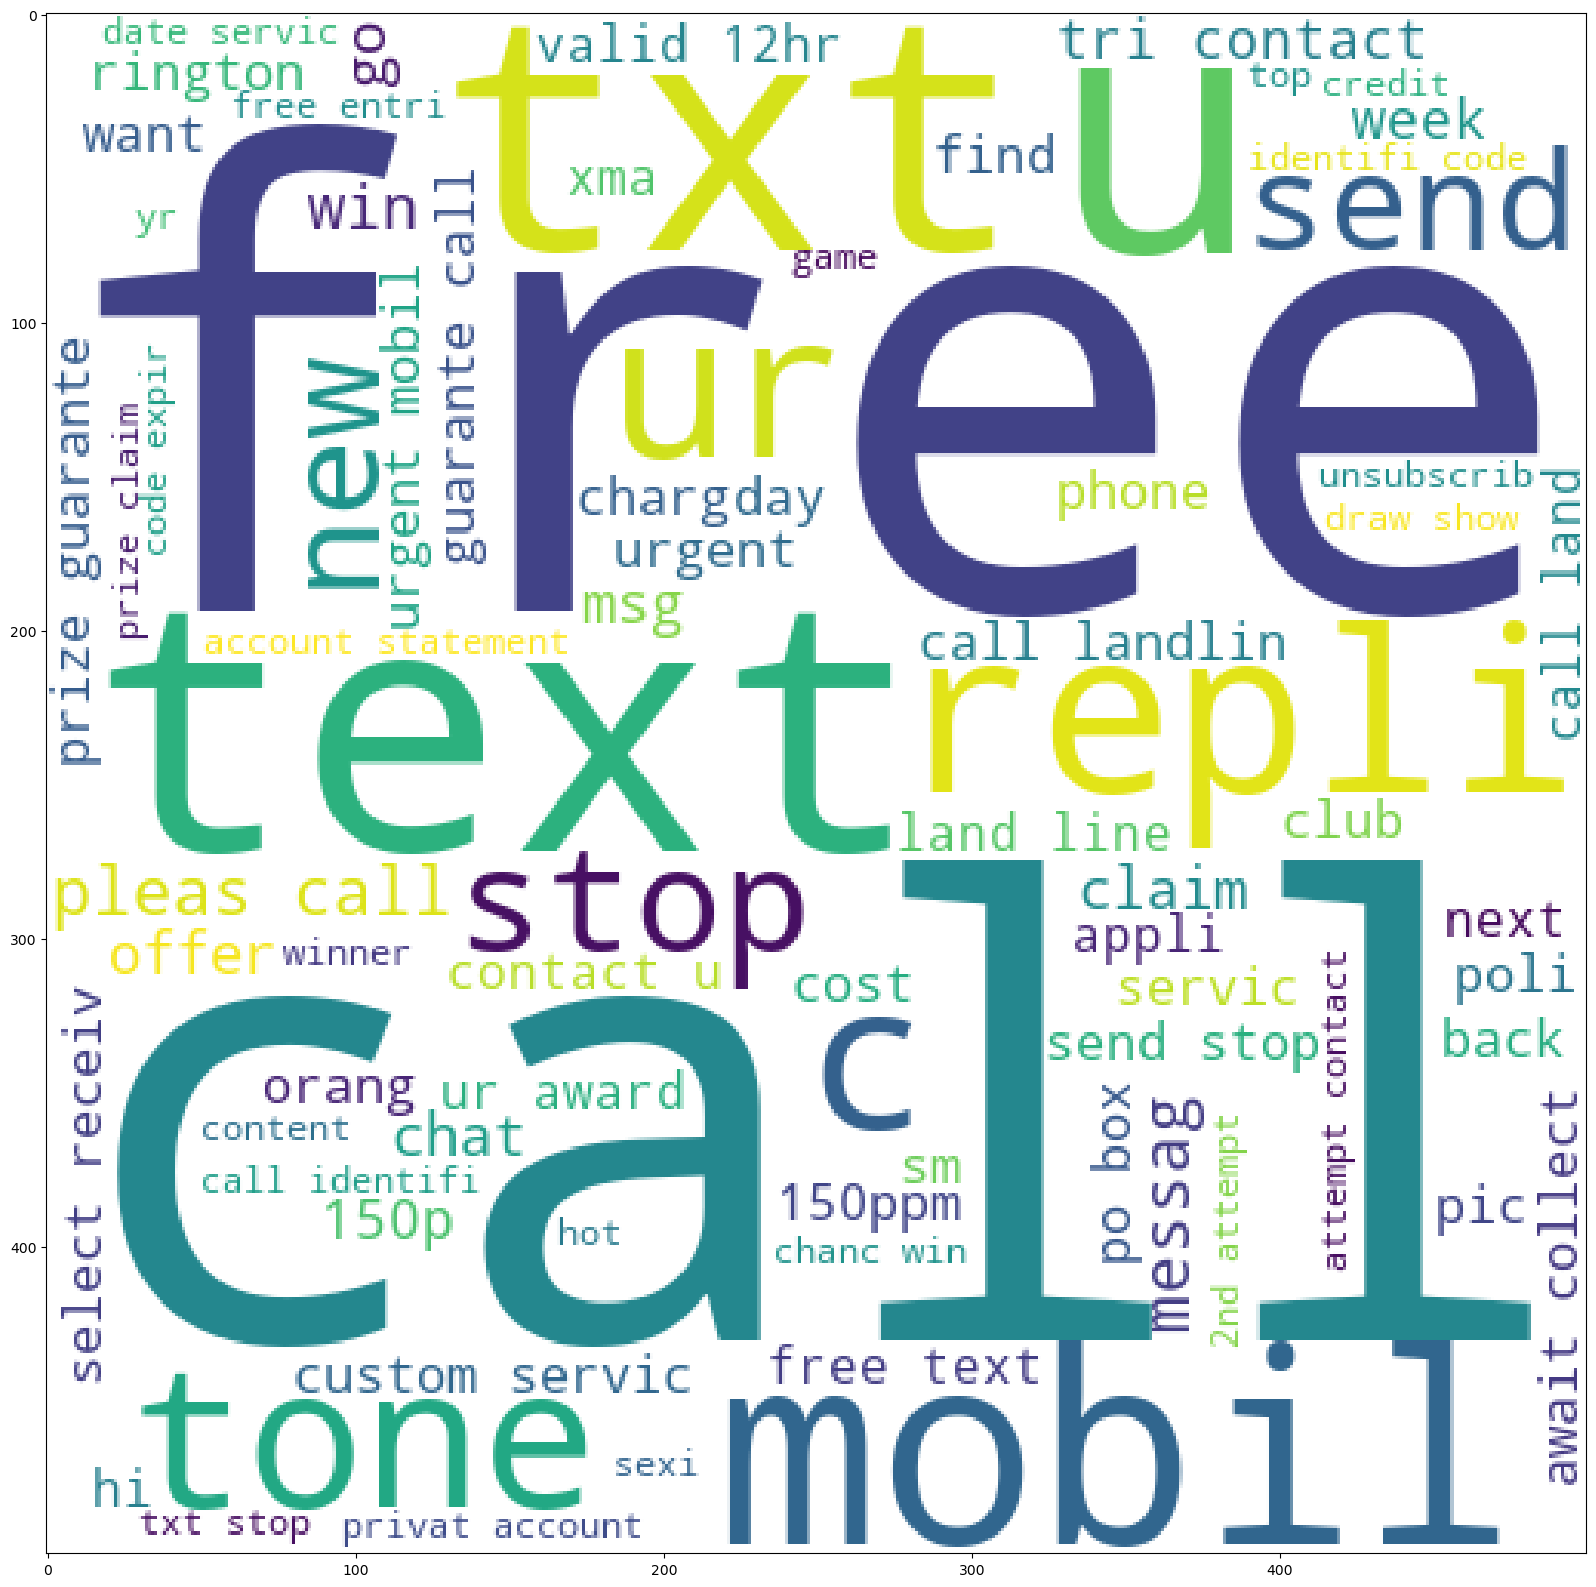

In [611]:
plt.figure(figsize=(20,20))
plt.imshow(spam_wc)

In [612]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

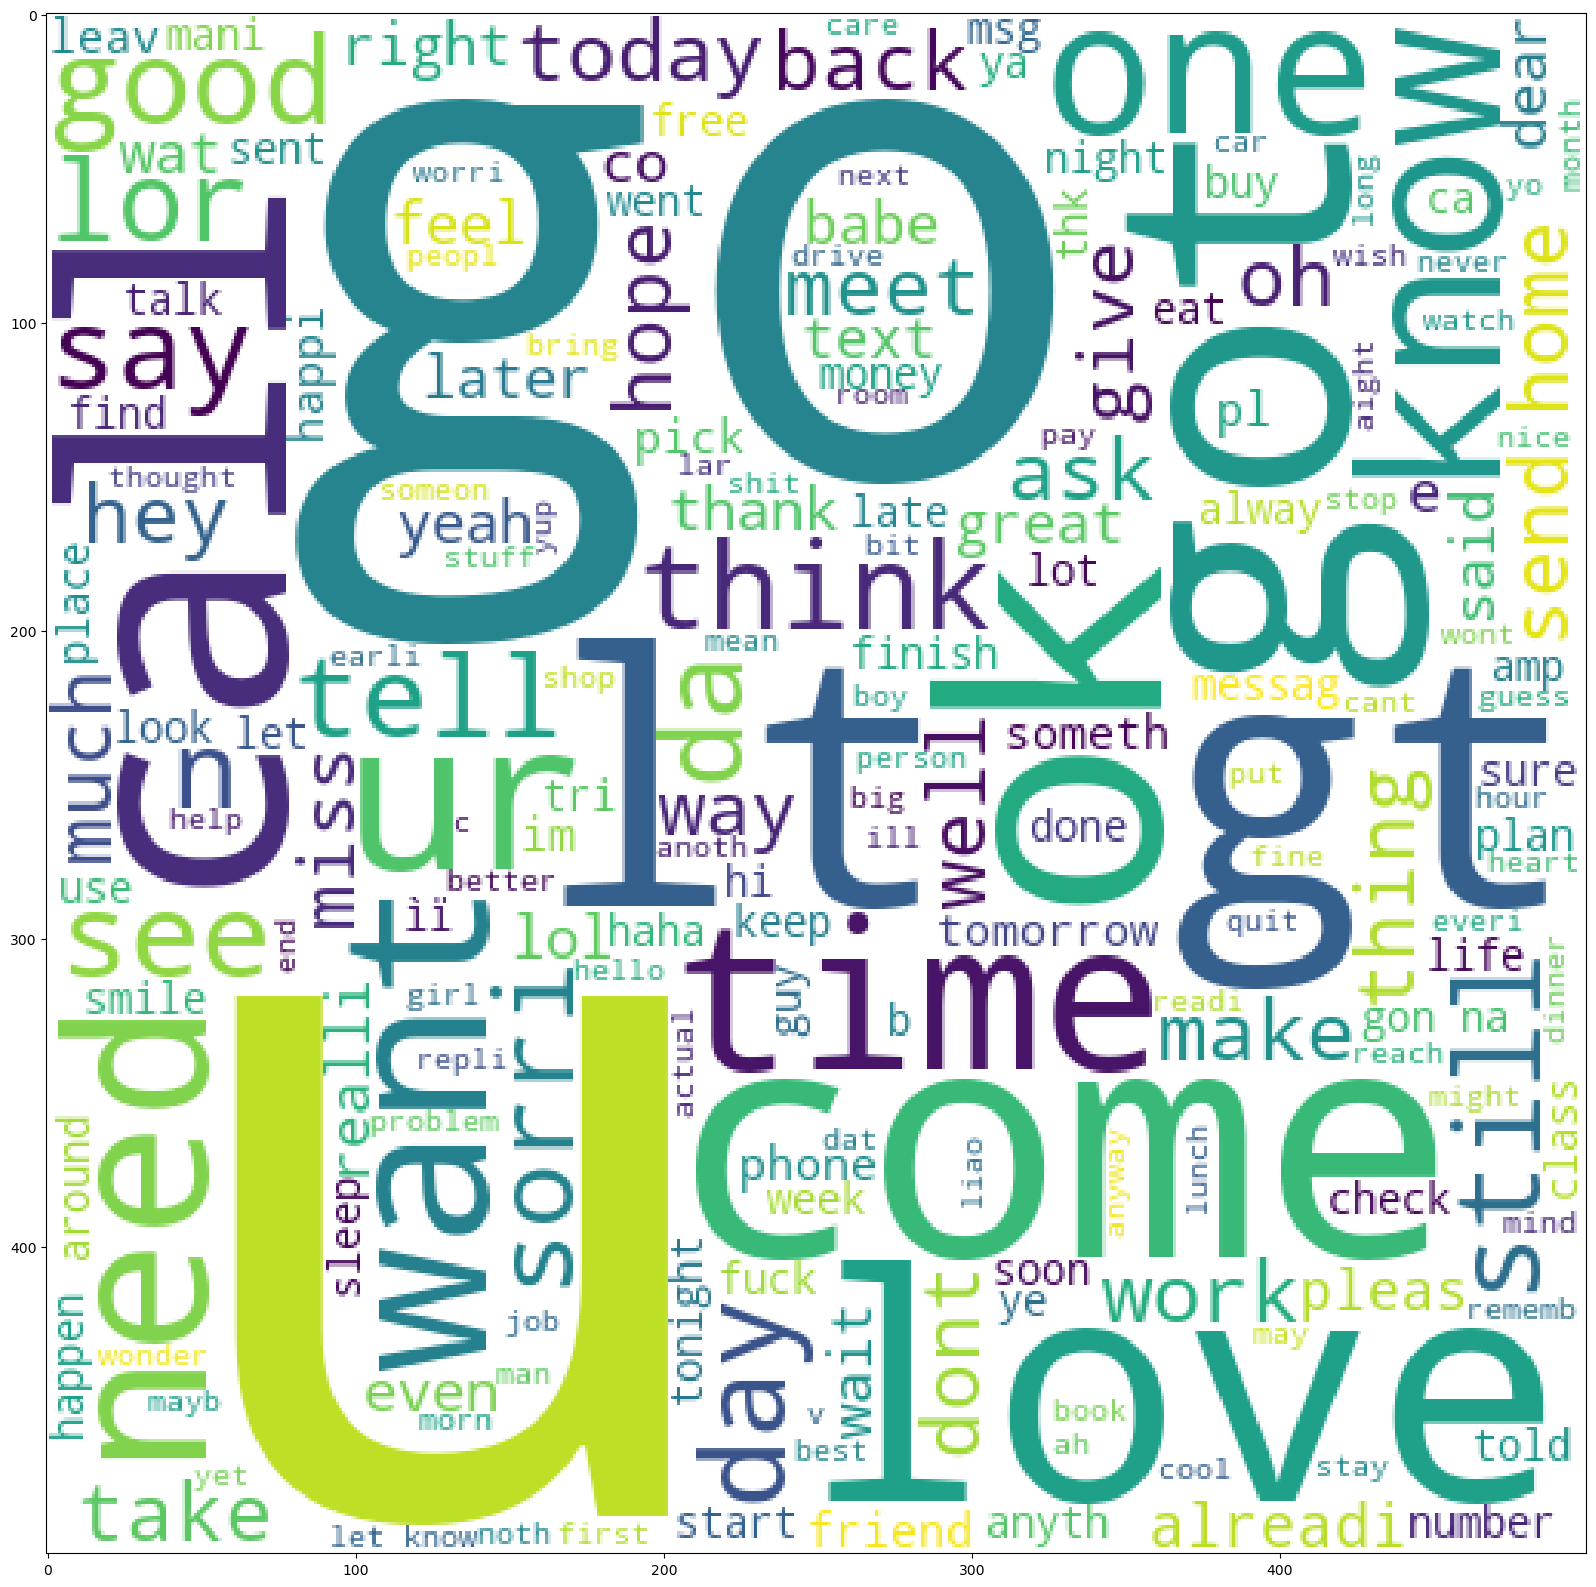

In [613]:
plt.figure(figsize=(20,20))
plt.imshow(ham_wc)

In [614]:
# we will see top 30 word for ham and spam

In [615]:
df.head()

,target,text,len_of_text,len_of_word,len_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [616]:
spam_corpus = []
for msg  in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    


In [617]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [618]:
len(spam_corpus)

9939

In [619]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [620]:
pd.DataFrame(Counter(spam_corpus).most_common(30)) # converting in to a dataframe 

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


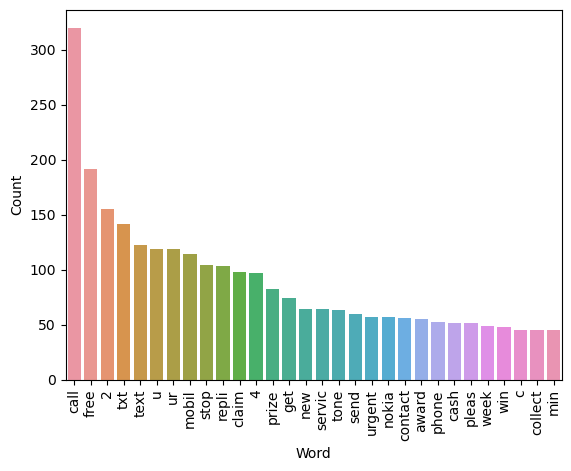

In [621]:
from collections import Counter
import pandas as pd
import seaborn as sns

# Create a counter of spam_corpus
word_counter = Counter(spam_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counter.most_common(30)

# Create a DataFrame from the most common words and counts
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation = 'vertical')
plt.show()


In [622]:
ham_corpus = []
for msg  in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [623]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [624]:
len(ham_corpus)

35394

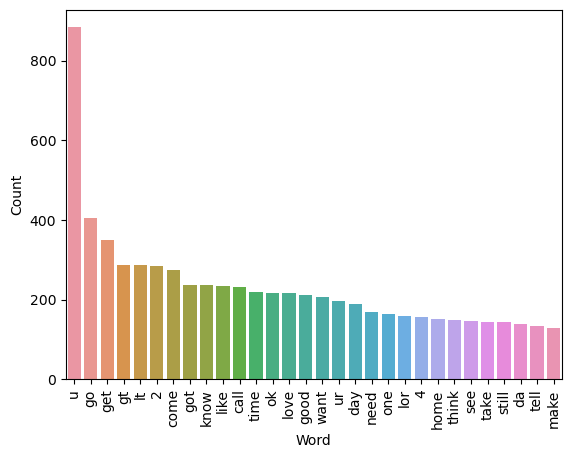

In [625]:
from collections import Counter
import pandas as pd
import seaborn as sns

# Create a counter of spam_corpus
word_counter = Counter(ham_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counter.most_common(30)

# Create a DataFrame from the most common words and counts
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation = 'vertical')
plt.show()


# 4 model building

In [626]:
# we will make neigh baised model because we will get best result for  textual data  

In [627]:
df.head()

,target,text,len_of_text,len_of_word,len_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [628]:
# since every leraning model need the data in numeric form but hear you can see it in textual form so we have to conver
# our data in numeric or vector form 

In [629]:
# there are three ways we can do this is 
 # 1 bag of words 
 # 2 TFIDF
 # 3 word to word 

In [630]:
# firstly we will vectorize our data and give input to our model 

In [631]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [632]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [633]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [634]:
x.shape

(5169, 6708)

In [635]:
y = df["target"].values

In [636]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [637]:
from sklearn.model_selection import train_test_split

In [638]:
x_train, x_test, y_train , y_test = train_test_split(x,y ,test_size=0.2, random_state = 2)

In [639]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [640]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [641]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [642]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [643]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [644]:
# rather to use bag of words i will use TFIDF vectotiser 

In [645]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [646]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [647]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [648]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [686]:
import numpy as np

In [650]:
# appending the num character col to x


#x = np.hstack((x,df['len_of_text'].values.reshape(-1,1)))



In [668]:
x.shape

(5169, 3001)

In [669]:
y = df["target"].values

In [670]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [671]:
from sklearn.model_selection import train_test_split

In [672]:
x_train, x_test, y_train , y_test = train_test_split(x,y ,test_size=0.2, random_state = 2)

In [673]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [674]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))



0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [675]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))



0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [676]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [677]:
# as we can see above in mnb of TfidfVectorizer has precision_score 1 which means that it is correctly classifieng wheather it 
# it is spam or ham  and in this case acuracy does not matter this much so we will keep precision with us 

In [678]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# mnb of TfidfVectorizer

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [680]:
svc =SVC(kernel = "sigmoid", gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth =5)

lrc = LogisticRegression(penalty='l2')

rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc =  BaggingClassifier(n_estimators = 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50 , random_state = 2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2)

In [681]:
clfs = {
    "SVC" : svc,
    "KN"  : knc,
    "NB"  : mnb, 
    "DT"  : dtc,
    "LR"  : lrc,
    "RF"  : rfc,
    "Adaboost"  : abc,
    "Bgc"  : bc,
    "ETC"  : etc, 
    "GBDT" : gbdt,
    "xgb" : xgb
}

In [682]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_text,y_pred)
    precision =  precision_score(y_test, y_pred)
    
    return accuracy,  precision


In [683]:
train_classifier(svc, x_train, y_train, x_test, y_test )

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [684]:

    
from sklearn.metrics import accuracy_score, precision_score

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("for", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for SVC
Accuracy - 0.8665377176015474
Precision - 0.0
for KN
Accuracy - 0.9303675048355899
Precision - 0.7894736842105263
for NB
Accuracy - 0.9410058027079303
Precision - 1.0
for DT
Accuracy - 0.9448742746615088
Precision - 0.8857142857142857


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for LR
Accuracy - 0.9671179883945842
Precision - 0.9905660377358491
for RF
Accuracy - 0.9680851063829787
Precision - 0.981651376146789
for Adaboost
Accuracy - 0.9642166344294004
Precision - 0.9316239316239316
for Bgc
Accuracy - 0.9661508704061895
Precision - 0.8992248062015504
for ETC
Accuracy - 0.9806576402321083
Precision - 0.9758064516129032
for GBDT
Accuracy - 0.9516441005802708
Precision - 0.9313725490196079
for xgb
Accuracy - 0.9709864603481625
Precision - 0.9426229508196722


In [687]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values("Precision",ascending = False)

In [688]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
4,LR,0.967118,0.990566
5,RF,0.968085,0.981651
8,ETC,0.980658,0.975806
10,xgb,0.970986,0.942623
6,Adaboost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,Bgc,0.966151,0.899225
3,DT,0.944874,0.885714
1,KN,0.930368,0.789474


In [689]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [690]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,LR,Accuracy,0.967118
2,RF,Accuracy,0.968085
3,ETC,Accuracy,0.980658
4,xgb,Accuracy,0.970986
5,Adaboost,Accuracy,0.964217
6,GBDT,Accuracy,0.951644
7,Bgc,Accuracy,0.966151
8,DT,Accuracy,0.944874
9,KN,Accuracy,0.930368


In [691]:
df.head()

,target,text,len_of_text,len_of_word,len_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [692]:
sns.catplot(x = "Algorithm", y = "value", hue = "variable", data = performance_df, kind = "bar", height = 5 )
plt.ylim(0.5, 1.0)
plt.xtricks(rotation = "vertical")
plt.show()

ValueError: Could not interpret input 'value'


# impove the model

In [693]:
# changing min max feature parameter in TFIDF


In [694]:
temp_df = pd.DataFrame ({'Algorithm': clfs.keys(), "Accuracy_max_ft_3000": accuracy_scores, "Precision_max_ft_3000": precision_scores})

In [695]:
temp_df =  pd.DataFrame ({'Algorithm': clfs.keys(), "Accuracy_scaling": accuracy_scores, "Precision_scaling": precision_scores})

In [696]:
new_df = performance_df.merge(temp_df, on = "Algorithm")


In [697]:
new_df_scaled = new_df.merge(temp_df, on = "Algorithm")

In [698]:
new_df_scaled 

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
1,LR,0.967118,0.990566,0.967118,0.990566,0.967118,0.990566
2,RF,0.968085,0.981651,0.968085,0.981651,0.968085,0.981651
3,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
4,xgb,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623
5,Adaboost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
6,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
7,Bgc,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
8,DT,0.944874,0.885714,0.944874,0.885714,0.944874,0.885714
9,KN,0.930368,0.789474,0.930368,0.789474,0.930368,0.789474
